### Homework 0

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def make_line():
    """This function returns a vector for the random line formed
    return: weights of line vector
    
    """
    (x1,y1) = np.random.uniform(-1, 1, 2 )
    (x2,y2) = np.random.uniform(-1, 1, 2 )
    slope = (y2 - y1)/(x2 - x1)
    intercept = y2 - slope*x2
    return np.array([intercept, slope, -1])

def plot_generate_classified_points(N, weights_line):
    """This function classifies randomly generated N points based on random line
       and plots the results
       args:
           N (int) - Number of points generated
           weights (numpy array, size 3) - weights for the random line
       Return: None
    """
    X = np.linspace(-1, 1, 10, endpoint=True)
    Y = weights_line[0] + weights_line[1]*X
    plt.ylim(-1, 1)
    plt.plot(X, Y)
    for i in range(N):
        x = np.concatenate((np.array([1]), np.random.uniform(-1, 1, 2 )))
        if np.dot(weights_line, x)> 0:
            plt.plot(x[1], x[2], marker='o', markersize=3, color="blue")
        else:
            plt.plot(x[1], x[2], marker='o', markersize=3, color="red")
    plt.show()
    return

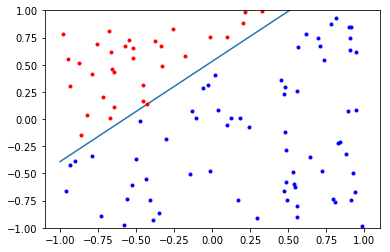

In [3]:
weights_line = make_line()
plot_generate_classified_points(100, weights_line)

### Homework 1

### Perceptron learning algorithm 

In [4]:
def generate_data(N, weights_line):
    """This function classifies randomly generated N points based on random line
       args:
           N (int) - Number of points generated
           weights (numpy array, size 3) - weights for the random line
       Return:
           data (list of length N) - randomly generated points
    """
    data = []
    for i in range(N):
        x = np.concatenate((np.array([1]), np.random.uniform(-1, 1, 2 )))
        if np.dot(weights_line, x)> 0:
            data.append((x, 1))
        else:
            data.append((x, -1))
    return data

def classify(data, w):
    """This function classifies data based on weights of line
       args:
           data (tuple(numpy array of size 2, int))- 
           w (numpy array, size 3) - weights for the line
       Return:
           misclassified_list (list) - list of misclassified points
    """    
    misclassified_list = []
    for (x,y) in data:
        if np.sign(np.dot(w, x)) != y:
            misclassified_list.append((x,y))
    return misclassified_list

def perceptron(data,w=np.array([0,0,0])):
    """This function implements the perceptron learning algorithm 
       args:
           data (tuple(numpy array of size 2, int))- 
           w (numpy array, size 3) - weights for the initial zero vector
       Return:
           w (numpy array, size 3) - weights for the final line
    """  
    misclassified_list = classify(data, w)
    steps = 1
    while len(misclassified_list)!= 0:
        (xi,yi) = random.choice(misclassified_list)
        w = w + xi*yi  
        misclassified_list = classify(data, w)
        steps +=1
    return w, steps

def plot(data, w, weights_line):
    """This function plots the data based on the final weight and also plots the random line to confirm results
       args:
           data (list of length N) - generated data
           w (numpy array, size 3) - final weights from PLA
           weights (numpy array, size 3) - weights for the random line
       Return: None
    """
    X = np.linspace(-1, 1, 10, endpoint=True)
    Y = weights_line[0] + weights_line[1]*X
    plt.ylim(-1, 1)
    plt.plot(X, Y, color = "yellow")
    for (x,y) in data:
        if np.dot(w, x)> 0:
            plt.plot(x[1], x[2], marker='o', markersize=3, color="blue")
        else:
            plt.plot(x[1], x[2], marker='o', markersize=3, color="red")
    plt.show()
    return

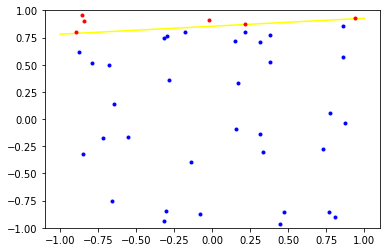

In [5]:
weights_line = make_line()
data = generate_data(40, weights_line)
w, steps = perceptron(data)
plot(data, w, weights_line)

### Simulation of PLA

In [36]:
def simulation(iterations, N, M):
    """This function simulates PLA and calculates number of steps to convergence and error rate
       args:
           iterations (int) - number of iterations for simulation
           N (int) - number of points to be generated by PLA
           M (int) - number of points to be generated by PLA for out of sample testing
       Return: None
    """
    steps_list = []
    error_list = [] 
    for i in range(iterations):
        weights_line = make_line()
        data = generate_data(N, weights_line)
        w, steps = perceptron(data)
        steps_list.append(steps)
        new_data = generate_data(M, weights_line)
        misclassified_list = classify(new_data, w)
        error_list.append(len(misclassified_list)/M)
        if i%100==0:
            print ("{:.2f}".format(100*(i+1)/iterations), '% ->', end='')
    return np.mean(steps_list), np.mean(error_list)

In [37]:
simulation(1000, 10, 100)

0.10 % ->10.10 % ->20.10 % ->30.10 % ->40.10 % ->50.10 % ->60.10 % ->70.10 % ->80.10 % ->90.10 % ->

(10.288, 0.10871)

In [39]:
simulation(300, 100, 100)

0.33 % ->33.67 % ->67.00 % ->

(111.32666666666667, 0.014866666666666669)

### Define Class for a PLA using functions developed above